In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras import *
import itertools
from tqdm import tqdm
#from google.colab import files

In [2]:
tf.__version__

'2.4.1'

# **Reading Data**

In [3]:
players = pd.read_excel('players (extension).xlsx', index_col = 0)

In [4]:
players.head()

,Name,Country,Current Rating,Potential Rating,Height (cm),Weight (kg),Preferred Foot,Birth Date,Age,Preferred Positions,...,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes,Specialities,Traits
0,Lionel Messi,Argentina,94,94,170,72,Left,"June 24, 1987",33,RW ST CF,...,94,75,88,14,6,11,15,8,"Dribbler, Distance Shooter, Crosser, FK Specia...","Finesse Shot, Long Shot Taker (CPU AI Only), S..."
1,Cristiano Ronaldo,Portugal,93,93,187,83,Right,"Feb. 5, 1985",35,ST LW,...,76,85,87,14,7,11,15,11,"Dribbler, Distance Shooter, Acrobat, Clinical ...","Power Free-Kick, Flair, Long Shot Taker (CPU A..."
2,Neymar Jr,Brazil,92,92,175,68,Right,"Feb. 5, 1992",28,LW CAM,...,89,92,87,15,9,9,15,11,"Speedster, Dribbler, Playmaker, Crosser, FK Sp...","Injury Prone, Flair, Speed Dribbler (CPU AI On..."
3,Virgil van Dijk,Netherlands,91,92,193,92,Right,"July 8, 1991",29,CB,...,70,62,45,11,13,10,13,11,"Tackling, Tactician, Strength, Complete Defender","Leadership, Long Passer (CPU AI Only), Power H..."
4,Jan Oblak,Slovenia,91,93,188,87,Right,"Jan. 7, 1993",27,GK,...,14,11,13,90,87,92,78,89,No,"GK Long Throw, Comes For Crosses"


In [5]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2940 entries, 0 to 2939
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 2940 non-null   object
 1   Country              2940 non-null   object
 2   Current Rating       2940 non-null   int64 
 3   Potential Rating     2940 non-null   int64 
 4   Height (cm)          2940 non-null   int64 
 5   Weight (kg)          2940 non-null   int64 
 6   Preferred Foot       2940 non-null   object
 7   Birth Date           2940 non-null   object
 8   Age                  2940 non-null   int64 
 9   Preferred Positions  2940 non-null   object
 10  Player Work Rate     2940 non-null   object
 11  Weak Foot            2940 non-null   int64 
 12  Skill Moves          2940 non-null   int64 
 13  Value (€)            2940 non-null   int64 
 14  Wage (€)             2940 non-null   int64 
 15  Team                 2940 non-null   object
 16  Positi

# **Preprocessing**

In [6]:
players[['Current Rating', 'Potential Rating', 'Wage (€)', 'Value (€)']].corr()

,Current Rating,Potential Rating,Wage (€),Value (€)
Current Rating,1.000000,0.652683,0.675215,0.733450
Potential Rating,0.652683,1.000000,0.540412,0.690986
Wage (€),0.675215,0.540412,1.000000,0.847953
Value (€),0.733450,0.690986,0.847953,1.000000


In [7]:
# creating X-matrix and Y-vector
x = players.loc[:, ['Height (cm)', 'Weight (kg)', 'Age', 'Weak Foot', 'Skill Moves', 'Contract Length',
                    'Ball Control', 'Dribbling', 'Marking', 'Slide Tackle', 'Stand Tackle', 'Aggression', 'Reactions',
                    'Att. Position', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short Pass', 'Long Pass',
                    'Acceleration', 'Stamina', 'Strength', 'Balance', 'Sprint Speed', 'Agility',
                    'Jumping', 'Heading', 'Shot Power', 'Finishing', 'Long Shots', 'Curve', 'FK Acc.', 'Penalties',
                    'Volleys', 'GK Positioning', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Reflexes']].values.copy()
y = players.loc[:, 'Value (€)'].values.copy()

In [8]:
# normalization of the matrix X
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)

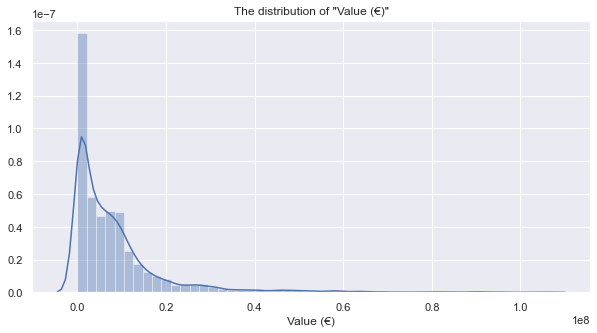

In [9]:
plt.figure(figsize = (10, 5))
sns.distplot(a = players['Value (€)'])
plt.title('The distribution of "Value (€)"')
plt.show()

In [10]:
# normalization of the vector Y
y = y / 1000000

# **Modeling**

In [11]:
# train, validation and test splits
x_train, x_val_test, y_train, y_val_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size = 0.5, random_state = 42)
# conver to tensor
## train data
tensor_x_train = tf.convert_to_tensor(value = x_train, dtype = tf.float32)
tensor_y_train = tf.convert_to_tensor(value = y_train, dtype = tf.float32)
## validation data
tensor_x_val = tf.convert_to_tensor(value = x_val, dtype = tf.float32)
tensor_y_val = tf.convert_to_tensor(value = y_val, dtype = tf.float32)
## test data
tensor_x_test = tf.convert_to_tensor(value = x_test, dtype = tf.float32)
tensor_y_test = tf.convert_to_tensor(value = y_test, dtype = tf.float32)

# reshape y vectors for Loss
tensor_y_train = tf.reshape(tensor_y_train, shape = [len(tensor_y_train), 1])
tensor_y_val = tf.reshape(tensor_y_val, shape = [len(tensor_y_val), 1])
tensor_y_test = tf.reshape(tensor_y_test, shape = [len(tensor_y_test), 1])

### AutoEncoder

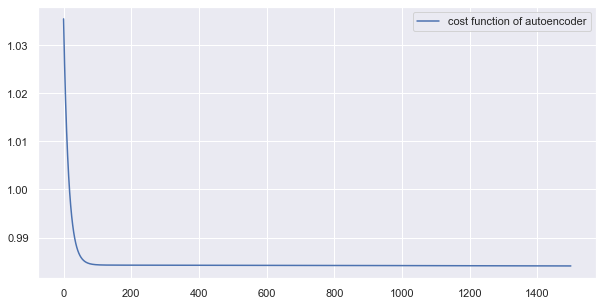

In [12]:
dimensionality = tensor_x_train.shape[1] # dimensionality = 43
code_size1 = 20
code_size2 = 10
k = 7 # dimension of manifold
epsilon = 0.1
gamma = 1.0
epochs = 1500
learning_rate = 0.1

# Autoencoder
## define parameters of the autoencoder
W1 = tf.Variable(initial_value = tf.random.truncated_normal(shape = (dimensionality, code_size1), mean = 0, stddev = 0.1))
b1 = tf.Variable(initial_value = tf.constant(0.1, shape = (code_size1)))
W2 = tf.Variable(initial_value = tf.random.truncated_normal(shape = (code_size1, code_size2), mean = 0, stddev = 0.1))
b2 = tf.Variable(initial_value = tf.constant(0.1, shape = (code_size2)))
W3 = tf.Variable(initial_value = tf.random.truncated_normal(shape = (code_size2, code_size1), mean = 0, stddev = 0.1))
b3 = tf.Variable(initial_value = tf.constant(0.1, shape = (code_size1)))
W4 = tf.Variable(initial_value = tf.random.truncated_normal(shape = (code_size1, dimensionality), mean = 0, stddev = 0.1))
b4 = tf.Variable(initial_value = tf.constant(0.1, shape = (dimensionality)))

## define autoencoder
def autoencoder(X):
    embedding_mapping1 = tf.math.sigmoid(tf.linalg.matmul(X, W1) + b1)
    embedding_mapping2 = tf.math.sigmoid(tf.linalg.matmul(embedding_mapping1, W2) + b2)
    recovery_mapping1 = tf.math.sigmoid(tf.linalg.matmul(embedding_mapping2, W3) + b3)
    recovery_mapping2 = tf.linalg.matmul(recovery_mapping1, W4) + b4
    return recovery_mapping2

## define Jacobian
def jacobian(X):
    embedding_mapping1 = tf.math.sigmoid(tf.linalg.matmul(X, W1) + b1)
    embedding_mapping2 = tf.math.sigmoid(tf.linalg.matmul(embedding_mapping1, W2) + b2)

    sigma_prime1 = tf.math.multiply(embedding_mapping1, 1 - embedding_mapping1)
    diag_sigma_prime1 = tf.linalg.diag(sigma_prime1)
    grad1 = tf.linalg.matmul(diag_sigma_prime1, W1, transpose_b = True)

    sigma_prime2 = tf.math.multiply(embedding_mapping2, 1 - embedding_mapping2)
    diag_sigma_prime2 = tf.linalg.diag(sigma_prime2)
    grad2 = tf.linalg.matmul(diag_sigma_prime2, W2, transpose_b = True)
  
    jacobian_matrix = tf.linalg.matmul(grad2, grad1)
    return jacobian_matrix

## smoothness penalty term of autoencoder's loss function
rand_x_train = tensor_x_train + tf.random.truncated_normal(shape = (tensor_x_train.shape), mean = 0, stddev = epsilon)
jacobian_x_train = jacobian(tensor_x_train)
jacobian_rand_x_train = jacobian(rand_x_train)

## define autoencoder's loss function
def autoencoder_loss_function(X, Xhat):
    return tf.math.reduce_mean(tf.math.square(X - Xhat)) + \
            gamma * tf.math.reduce_mean(tf.square(jacobian_x_train - jacobian_rand_x_train))

## train autoencoder
loss_values = list()
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        xhat = autoencoder(tensor_x_train)
        loss_value = autoencoder_loss_function(tensor_x_train, xhat)
        loss_values.append(loss_value)
        ### get gradients
        gradients = tape.gradient(loss_value, [W1, b1, W2, b2, W3, b3, W4, b4])
        ### compute and adjust weights
        W1.assign_sub(gradients[0] * learning_rate)
        b1.assign_sub(gradients[1] * learning_rate)
        W2.assign_sub(gradients[2] * learning_rate)
        b2.assign_sub(gradients[3] * learning_rate)
        W3.assign_sub(gradients[4] * learning_rate)
        b3.assign_sub(gradients[5] * learning_rate)
        W4.assign_sub(gradients[6] * learning_rate)
        b4.assign_sub(gradients[7] * learning_rate)

## bases of the tangent spaces
bases_tangent_spaces = list()
for x_train_i in jacobian(tensor_x_train):
    _, _, v = tf.linalg.svd(x_train_i)
    bases_tangent_spaces.append(v[:, :k])
tensor_bases_tangent_spaces = tf.convert_to_tensor(bases_tangent_spaces)

plt.figure(figsize = (10, 5))
plt.plot(loss_values, label = 'cost function of autoencoder')
plt.legend()
plt.savefig('autoencoder_mtc2.png', pdi = 500)
plt.show()

### Regression

In [13]:
def model(X_train, Y_train, X_val, Y_val, activation, neurons, learning_rate, epochs, lmbda,
          tensor_bases_tangent_spaces = tensor_bases_tangent_spaces):
    results = {'cost_train': [], 'cost_val': []}
    
    # Regression model
    m = Sequential()
    ## layers
    m.add(layers.Input(shape = (X_train.shape[1], )))
    for neuron in neurons:
        if activation == 'relu':
            m.add(layers.Dense(neuron, activation = 'relu', kernel_initializer = tf.keras.initializers.HeNormal()))
        elif activation == 'tanh':
            m.add(layers.Dense(neuron, activation = 'tanh', kernel_initializer = tf.keras.initializers.GlorotNormal()))
        else:
            raise Exception('activation must be either relu or tanh')
    m.add(tf.keras.layers.Dense(1, activation = 'relu'))

    ## cost funtion (val)
    def cost(y, yhat):
        return tf.math.reduce_mean(tf.math.square(tf.math.subtract(y, yhat)))

    ## cost function (train)
    def cost_with_reg(y, yhat, m_gradients, tensor_bases_tangent_spaces):
        m_gradients_new = tf.reshape(m_gradients, shape = [m_gradients.shape[0]*m_gradients.shape[1], -1])
        tensor_bases_tangent_spaces_new = tf.reshape(tensor_bases_tangent_spaces, shape = [tensor_bases_tangent_spaces.shape[0]*tensor_bases_tangent_spaces.shape[1], -1])
        regularizer = tf.linalg.matmul(m_gradients_new, tensor_bases_tangent_spaces_new, transpose_a = True)
        return tf.math.reduce_mean(tf.math.square(tf.math.subtract(y, yhat))) + lmbda * (1/y.shape[0]) * tf.math.reduce_mean(tf.math.square(regularizer))
        #regularizer = 0
        #for gradient, basis_tg_space in zip(m_gradients, tensor_bases_tangent_spaces):
        #    regularizer += tf.math.reduce_mean(tf.math.square(tf.linalg.matmul(tf.reshape(gradient, shape = [1, gradient.shape[0]]), basis_tg_space)))
        #return tf.math.reduce_mean(tf.math.square(tf.math.subtract(y, yhat))) + lambda * (1/y.shape[0]) * regularizer

    ## train model
    for epoch in range(epochs):
        with tf.GradientTape() as tape1:
            ### prepare components of regularizer
            var_X_train = tf.Variable(X_train)
            m_gradients = tape1.gradient(m(var_X_train), var_X_train)
        with tf.GradientTape() as tape2:
            ### compute model's loss function
            yhat = m(X_train)
            loss_train = cost_with_reg(Y_train, yhat, m_gradients, tensor_bases_tangent_spaces)
            results['cost_train'].append(loss_train)
            #### get gradients
            loss_gradients = tape2.gradient(loss_train, m.weights)
            #### compute and adjust weights
            for gradient, weight in zip(loss_gradients, m.weights):
                weight.assign_sub(gradient * learning_rate)
            loss_val = cost(Y_val, m(X_val))
            results['cost_val'].append(loss_val)

    ## rsquare
    results['r2_train'] = r2_score(Y_train, m(X_train))
    results['r2_val'] = r2_score(Y_val, m(X_val))

    return results, m

In [14]:
param_grid = {
    'activation': ['relu'],
    'neurons': [[5], [20], [5, 5], [10, 10], [20, 20]],
    'learning_rate': [0.0005],
    'epochs': [10000],
    'lmbda': [1.0, 0.1, 0.0]
}

# Generate all combinations of hyperparameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

cost_trains = list()
cost_vals = list()
r2_trains = list()
r2_vals = list()

for param in tqdm(all_params):
    try:
        with tf.device('/device:GPU:0'):
            results, _ = model(X_train = tensor_x_train, Y_train = tensor_y_train, X_val = tensor_x_val, Y_val = tensor_y_val,
                               activation = param['activation'], neurons = param['neurons'],
                               learning_rate = param['learning_rate'], epochs = param['epochs'], lmbda = param['lmbda'])
            cost_trains.append(results['cost_train'][-1].numpy())
            cost_vals.append(results['cost_val'][-1].numpy())
            r2_trains.append(results['r2_train'])
            r2_vals.append(results['r2_val'])
    except:
        cost_trains.append(None)
        cost_vals.append(None)
        r2_trains.append(None)
        r2_vals.append(None)
    # save results after each iteration
    all_results = pd.DataFrame(all_params[: len(cost_trains)])
    all_results['cost_trains'] = cost_trains
    all_results['cost_vals'] = cost_vals
    all_results['r2_trains'] = r2_trains
    all_results['r2_vals'] = r2_vals
    all_results.to_excel('mtc2/' +  str(len(cost_trains)) + '_mtc2.xlsx', index = False)
    #files.download('mtc_2.xlsx')

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [23:13<00:00, 92.93s/it]


In [15]:
all_results.sort_values(by = ['r2_vals', 'r2_trains']).head()

,activation,neurons,learning_rate,epochs,lmbda,cost_trains,cost_vals,r2_trains,r2_vals
7,relu,"[5, 5]",0.0005,10000,0.1,83.986786,25.187927,0.886173,0.726941
1,relu,[5],0.0005,10000,0.1,90.290741,23.793644,0.863319,0.742057
6,relu,"[5, 5]",0.0005,10000,1.0,654.782104,19.211155,0.930588,0.791735
0,relu,[5],0.0005,10000,1.0,610.570190,19.167284,0.881563,0.792210
2,relu,[5],0.0005,10000,0.0,12.447171,18.796816,0.905828,0.796227


# **Conclusion**

### with regularizer

In [16]:
# Hyperparameters of model
activation = 'relu'
neurons = [20, 20] 
learning_rate = 0.0005
epochs = 4000
lmbda = 0.1

In [17]:
results, m = model(X_train = tensor_x_train, Y_train = tensor_y_train, X_val = tensor_x_val, Y_val = tensor_y_val,
                   activation = activation, neurons = neurons,
                   learning_rate = learning_rate, epochs = epochs, lmbda = lmbda)

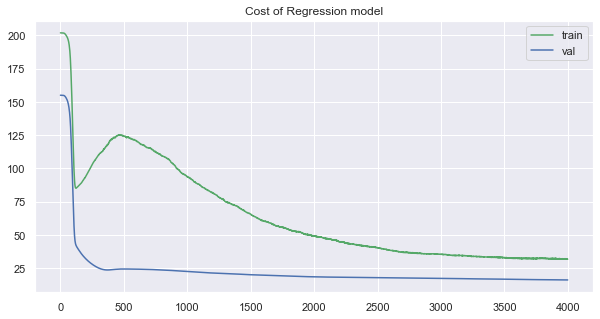

In [18]:
plt.figure(figsize = (10, 5))
plt.plot(results['cost_train'], 'g', label = 'train')
plt.plot(results['cost_val'], 'b', label = 'val')
plt.title('Cost of Regression model')
plt.legend()
plt.savefig('cost_mtc2_with_reg.png', pdi = 500)
plt.show()

In [19]:
print('rsquare for train set:', r2_score(m(tensor_x_train), tensor_y_train))
print('rsquare for val set:', r2_score(m(tensor_x_val), tensor_y_val))
print('rsquare for test set:', r2_score(m(tensor_x_test), tensor_y_test))

rsquare for train set: 0.9468421626503222
rsquare for val set: 0.822091943222967
rsquare for test set: 0.8910341191228413


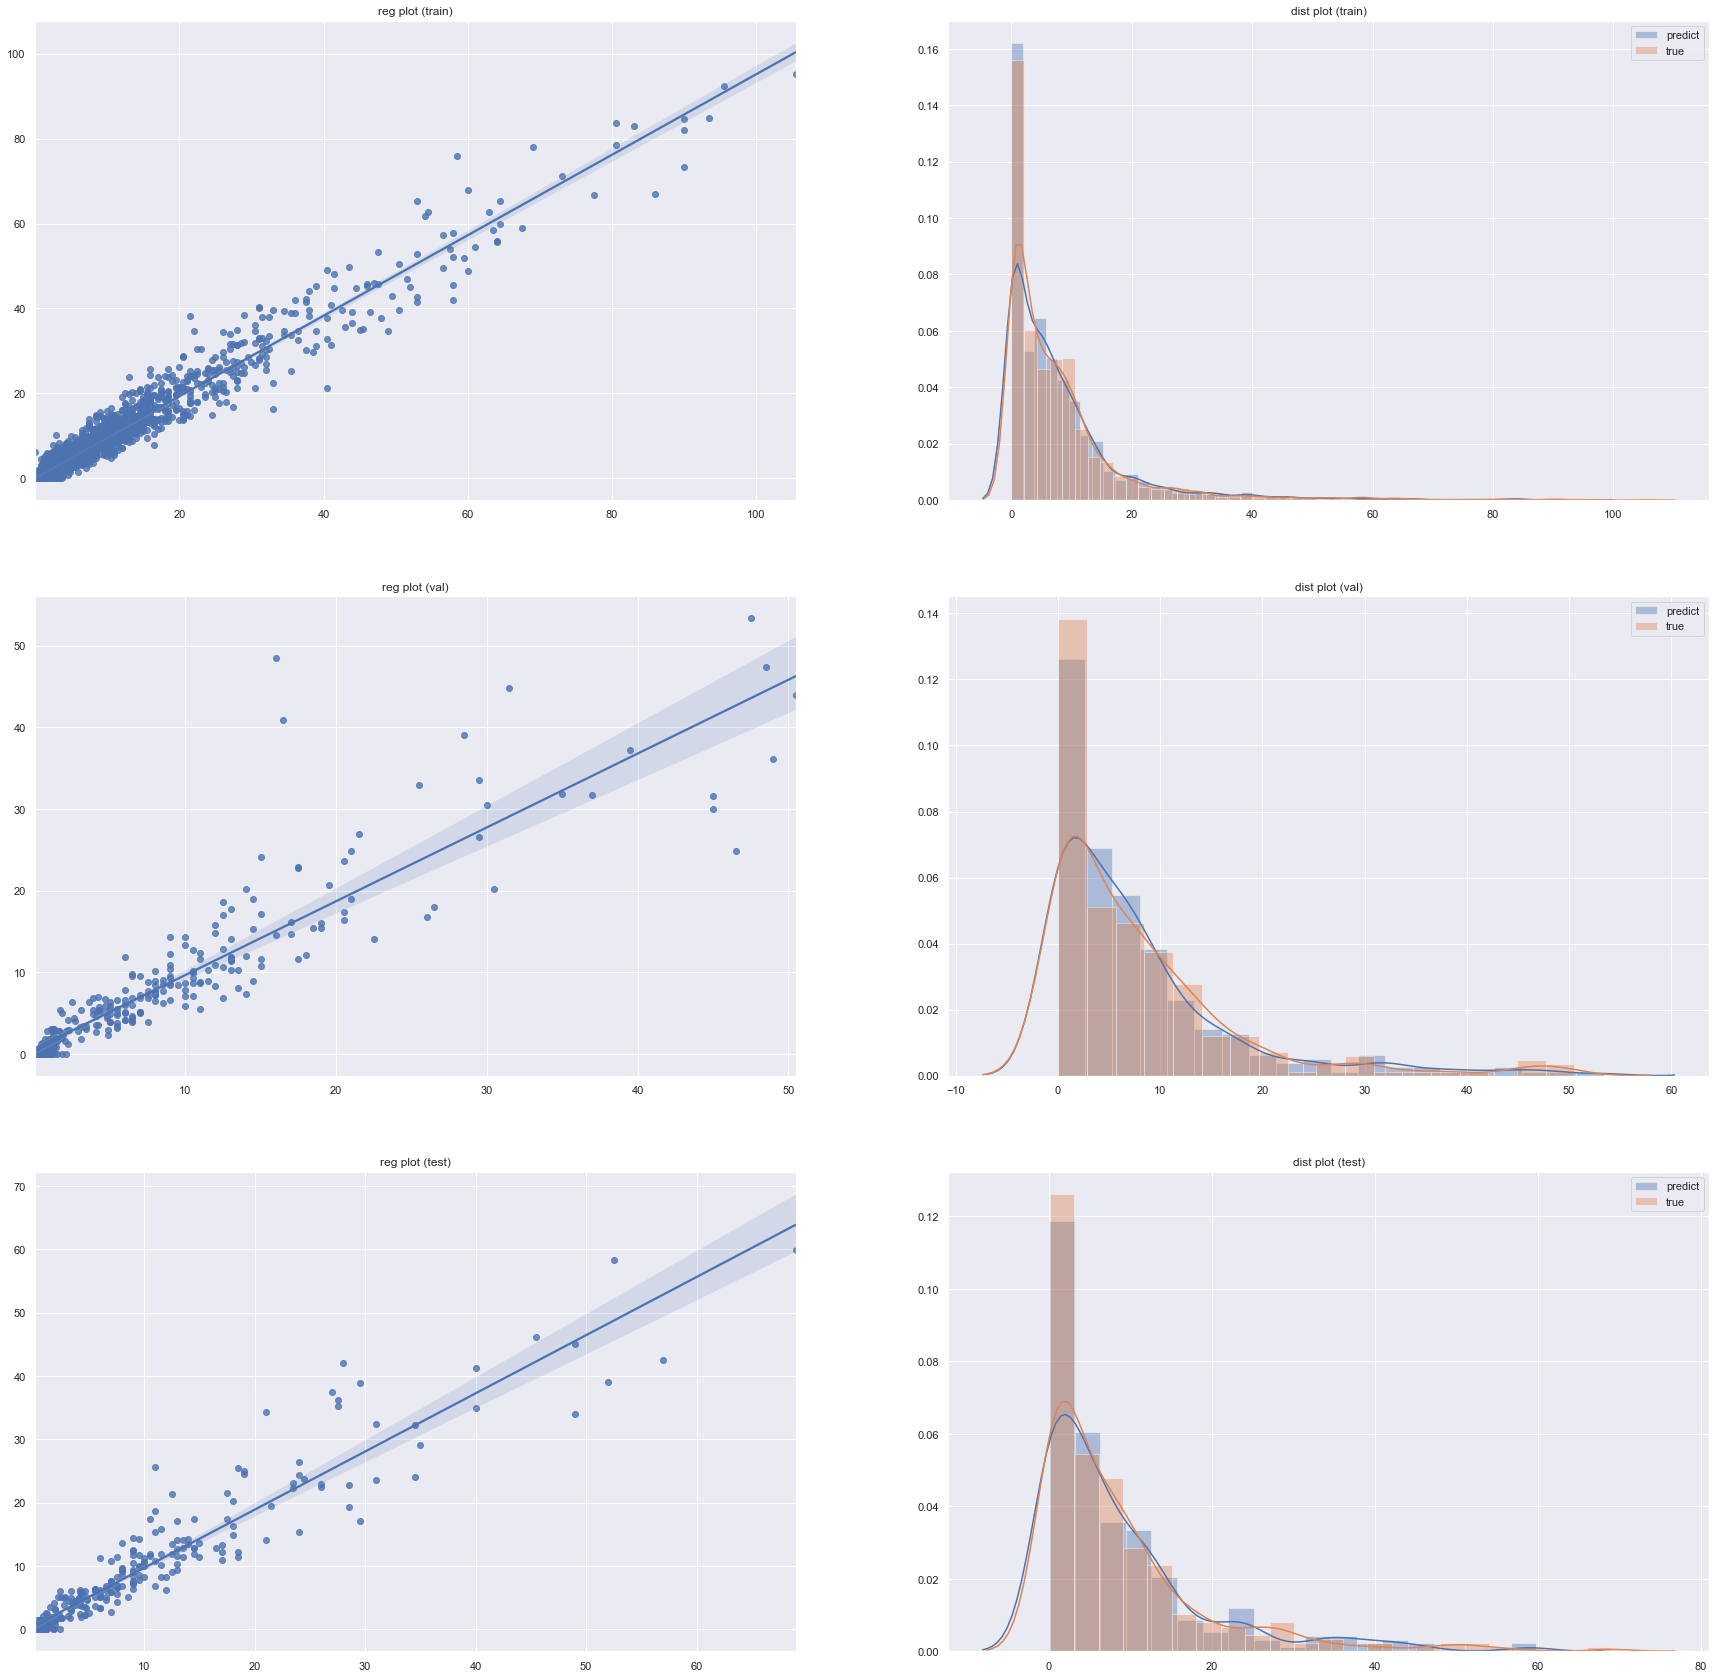

In [20]:
fig, ax = plt.subplots(3, 2, figsize = (30, 30))

# train
## regplot
sns.regplot(x = tensor_y_train, y = m(tensor_x_train), ax = ax[0][0])
ax[0][0].set_title('reg plot (train)')
## distplot
sns.distplot(m(tensor_x_train), label = 'predict', ax = ax[0][1])
sns.distplot(tensor_y_train, label = 'true', ax = ax[0][1])
ax[0][1].set_title('dist plot (train)')
ax[0][1].legend()

# val
## regplot
sns.regplot(x = tensor_y_val, y = m(tensor_x_val), ax = ax[1][0])
ax[1][0].set_title('reg plot (val)')
## distplot
sns.distplot(m(tensor_x_val), label = 'predict', ax = ax[1][1])
sns.distplot(tensor_y_val, label = 'true', ax = ax[1][1])
ax[1][1].set_title('dist plot (val)')
ax[1][1].legend()

# test
## regplot
sns.regplot(x = tensor_y_test, y = m(tensor_x_test), ax = ax[2][0])
ax[2][0].set_title('reg plot (test)')
## distplot
sns.distplot(m(tensor_x_test), label = 'predict', ax = ax[2][1])
sns.distplot(tensor_y_test, label = 'true', ax = ax[2][1])
ax[2][1].set_title('dist plot (test)')
ax[2][1].legend()

plt.savefig('mtc2_with_reg.png', pdi = 500)
plt.show()

### without regularizer

In [21]:
# Hyperparameters of model
activation = 'relu'
neurons = [10, 10] 
learning_rate = 0.0005
epochs = 10000
lmbda = 0.

In [22]:
results, m = model(X_train = tensor_x_train, Y_train = tensor_y_train, X_val = tensor_x_val, Y_val = tensor_y_val,
                   activation = activation, neurons = neurons,
                   learning_rate = learning_rate, epochs = epochs, lmbda = lmbda)

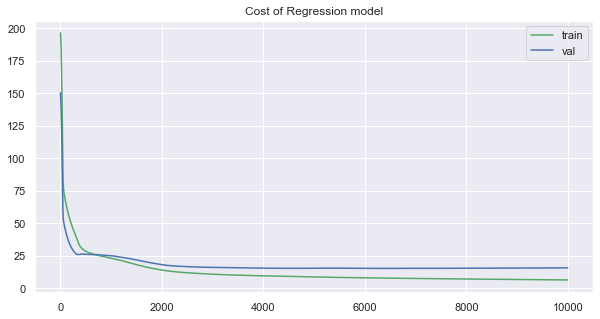

In [23]:
plt.figure(figsize = (10, 5))
plt.plot(results['cost_train'], 'g', label = 'train')
plt.plot(results['cost_val'], 'b', label = 'val')
plt.title('Cost of Regression model')
plt.legend()
plt.show()

In [24]:
print('rsquare for train set:', r2_score(m(tensor_x_train), tensor_y_train))
print('rsquare for val set:', r2_score(m(tensor_x_val), tensor_y_val))
print('rsquare for test set:', r2_score(m(tensor_x_test), tensor_y_test))

rsquare for train set: 0.950120291472923
rsquare for val set: 0.8219798870958714
rsquare for test set: 0.8501069184058401


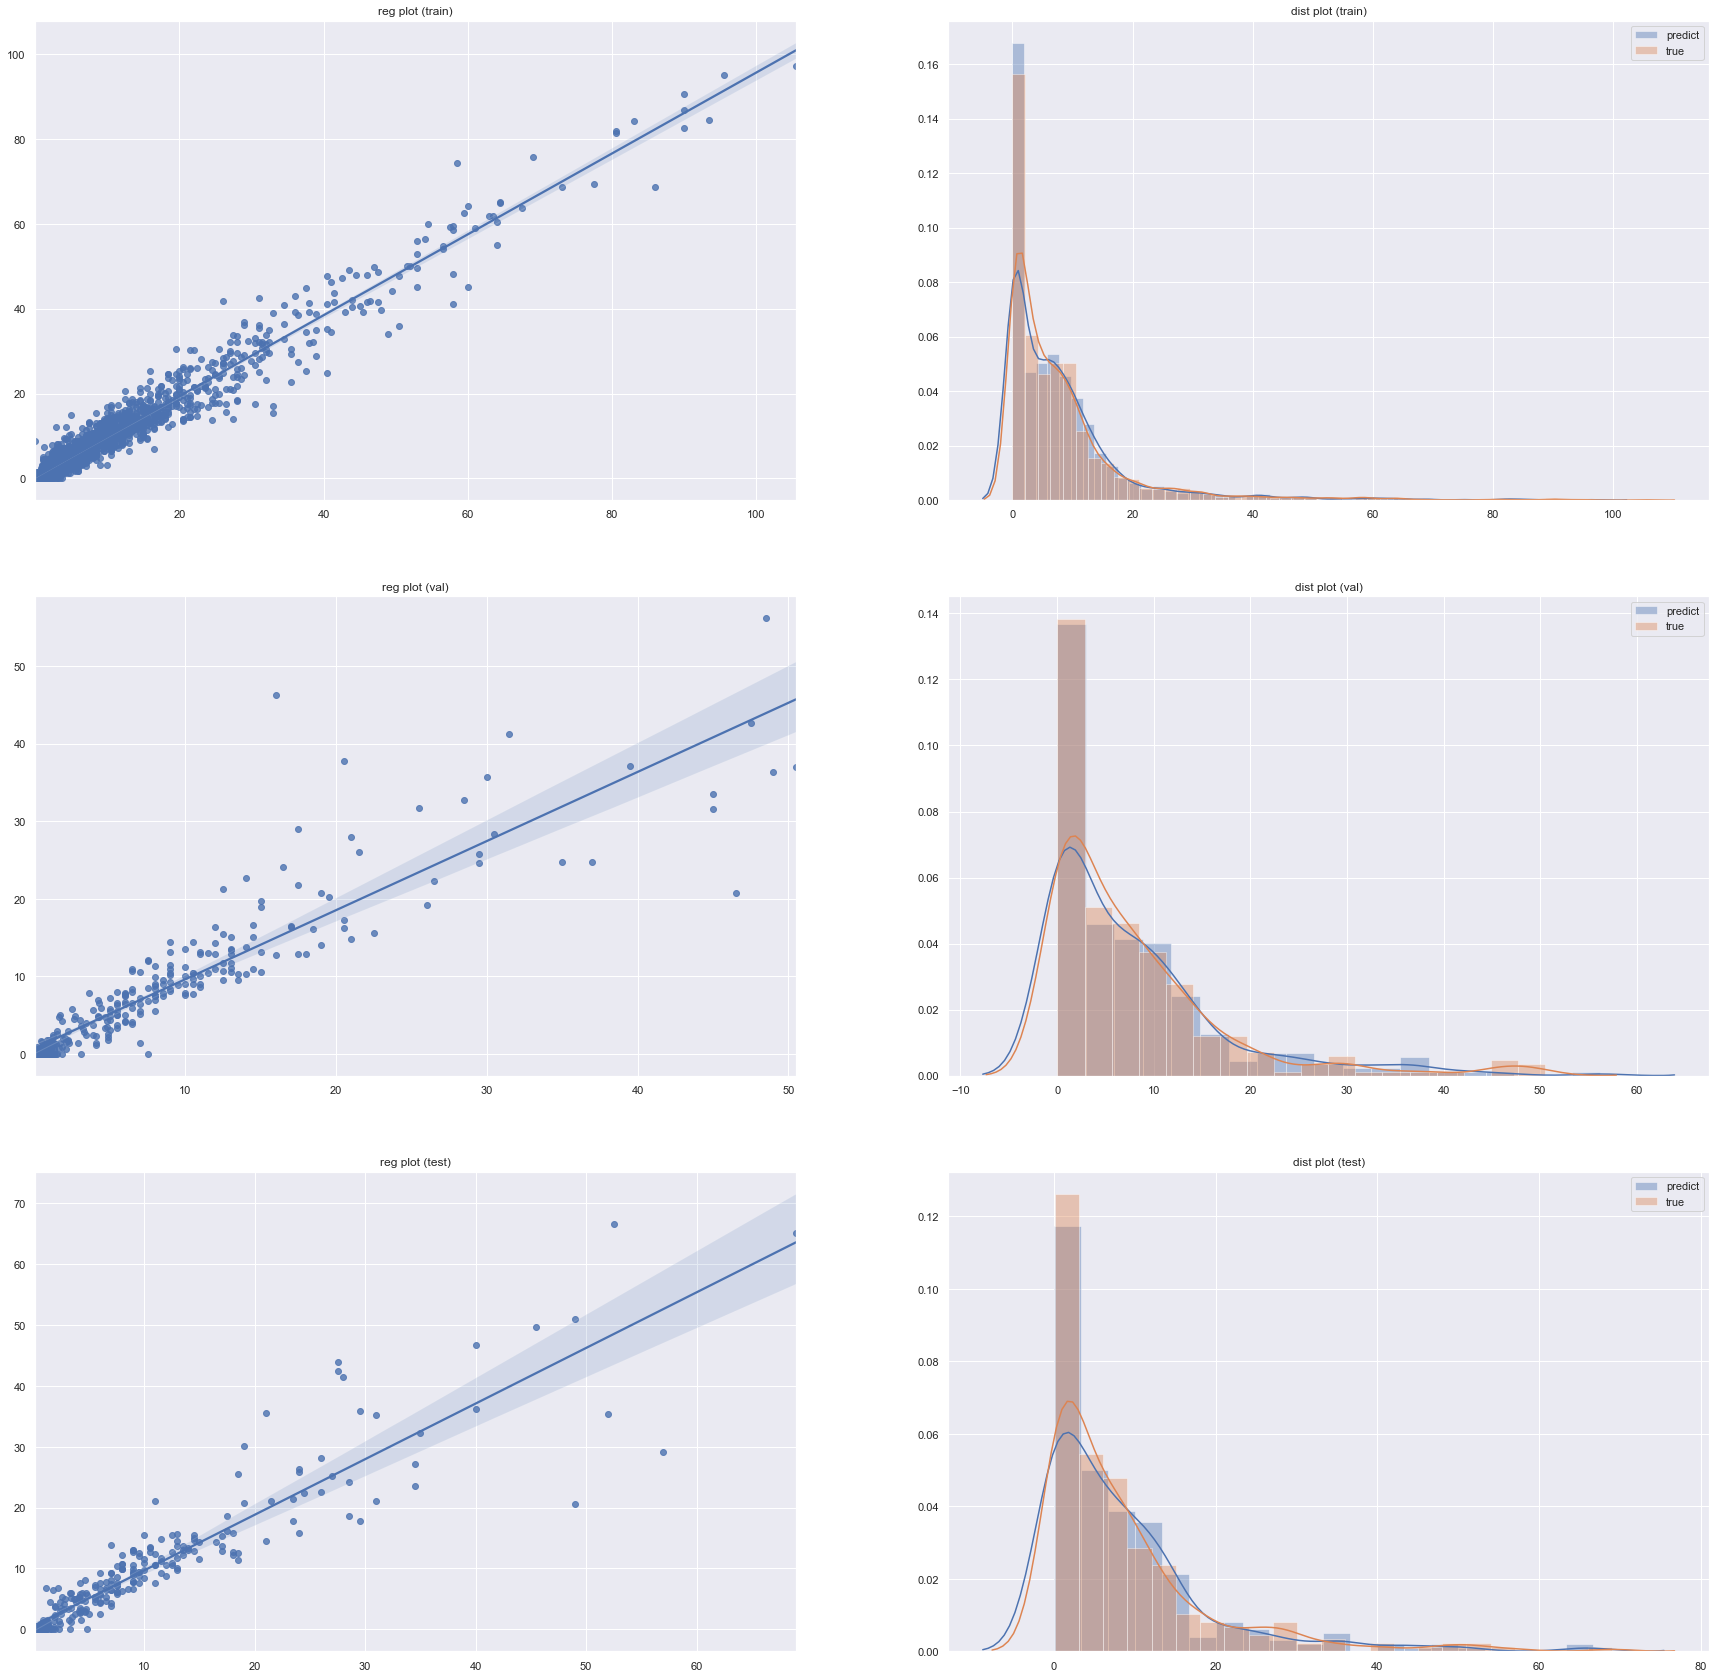

In [25]:
fig, ax = plt.subplots(3, 2, figsize = (30, 30))

# train
## regplot
sns.regplot(x = tensor_y_train, y = m(tensor_x_train), ax = ax[0][0])
ax[0][0].set_title('reg plot (train)')
## distplot
sns.distplot(m(tensor_x_train), label = 'predict', ax = ax[0][1])
sns.distplot(tensor_y_train, label = 'true', ax = ax[0][1])
ax[0][1].set_title('dist plot (train)')
ax[0][1].legend()

# val
## regplot
sns.regplot(x = tensor_y_val, y = m(tensor_x_val), ax = ax[1][0])
ax[1][0].set_title('reg plot (val)')
## distplot
sns.distplot(m(tensor_x_val), label = 'predict', ax = ax[1][1])
sns.distplot(tensor_y_val, label = 'true', ax = ax[1][1])
ax[1][1].set_title('dist plot (val)')
ax[1][1].legend()

# test
## regplot
sns.regplot(x = tensor_y_test, y = m(tensor_x_test), ax = ax[2][0])
ax[2][0].set_title('reg plot (test)')
## distplot
sns.distplot(m(tensor_x_test), label = 'predict', ax = ax[2][1])
sns.distplot(tensor_y_test, label = 'true', ax = ax[2][1])
ax[2][1].set_title('dist plot (test)')
ax[2][1].legend()

plt.show()